In [54]:
from dataset import download_dataset

download_dataset('uciml/iris')

In [173]:
import pandas as pd
import numpy as np

# Assuming 'data.csv' is your CSV file
df = pd.read_csv('iris.csv')

# Separate the features and the target variable
X = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']].to_numpy()
y = df['Species']

# Convert the species labels to integers
species_to_int = {species: idx for idx, species in enumerate(np.unique(y))}
y_int = np.array([species_to_int[species] for species in y])

# Optionally, convert the integer labels to one-hot encoding
def one_hot_encode(labels, num_classes):
    return np.eye(num_classes)[labels]

num_classes = len(species_to_int)
y_one_hot = one_hot_encode(y_int, num_classes)

# Now you have X and y ready to be used with PyTorch



In [175]:
from sklearn.model_selection import train_test_split
import torch

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y_one_hot, dtype=torch.float32)
# Assuming you have your features as X and labels as y (from the previous steps)
X_train, X_test, y_train, y_test = train_test_split(X_tensor, y_tensor, test_size=0.2)

In [176]:
import numpy as np
x = X[:, 2:4]  # use "Petal length" and "Petal width" only
d = x.shape[1]
num_cut = [1, 1]  # "Petal length" and "Petal width"
num_leaf = np.prod(np.array(num_cut) + 1)
num_class = 3
x_tensor = torch.tensor(x, dtype=torch.float32)
print(x.shape, y_one_hot.shape, d, num_cut, num_leaf, num_class)

(150, 2) (150, 3) 2 [1, 1] 4 3


In [177]:
x_tensor = torch.tensor(x, dtype=torch.float32)
y_tensor = torch.tensor(y_one_hot, dtype=torch.float32)

In [178]:
import torch
# Initialize variables
cut_points_list = [torch.nn.Parameter(torch.rand(i)) for i in num_cut]
leaf_score = torch.nn.Parameter(torch.rand(num_leaf, num_class))

# Define loss and optimizer
optimizer = torch.optim.Adam([*cut_points_list, leaf_score], lr=0.1)
loss_fn = torch.nn.CrossEntropyLoss()
loss_function = torch.nn.CrossEntropyLoss()

In [179]:
from pytorch_neural import nn_decision_tree
# Training loop
for i in range(1000):
    optimizer.zero_grad()
    y_pred = nn_decision_tree(x_tensor, cut_points_list, leaf_score, temperature=0.1)
    loss = loss_fn(y_pred, y_tensor)
    loss.backward()
    optimizer.step()

    if i % 200 == 0:
        print(loss.item())
#print('error rate %.2f' % (1-np.mean(np.argmax(y_pred.detach().numpy(), axis=1)==np.argmax(y, axis=1))))


# Test the model
with torch.no_grad():
    y_pred = nn_decision_tree(x_tensor, cut_points_list, leaf_score, temperature=0.1)
    loss = loss_function(y_pred, y_tensor)
    print('test loss %.2f' % loss.item())


1.060516357421875
0.34519633650779724
0.1581183224916458
0.15591546893119812
0.15367408096790314
test loss 0.15


In [156]:
sample_x0 = np.repeat(np.linspace(0, np.max(x[:,0]), 100), 100).reshape(-1,1)
sample_x1 = np.tile(np.linspace(0, np.max(x[:,1]), 100).reshape(-1,1), [100,1])
sample_x = np.hstack([sample_x0, sample_x1])
sample_x_tensor = torch.tensor(sample_x, dtype=torch.float32)

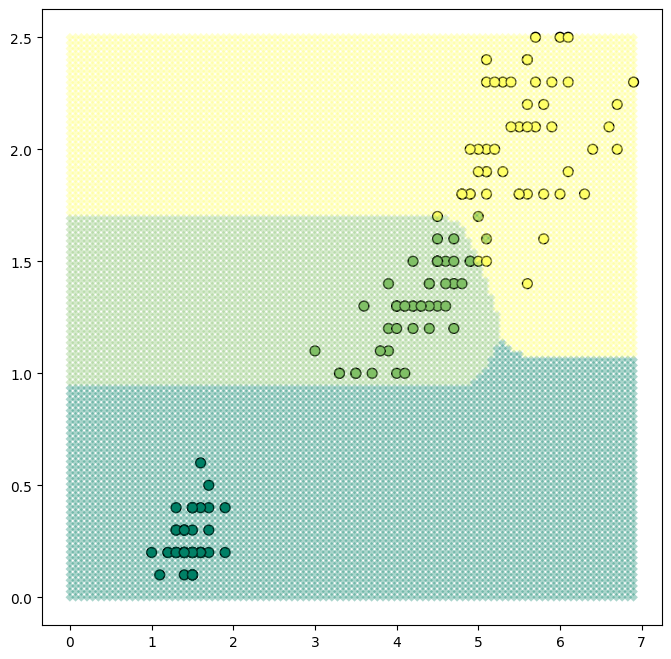

In [157]:
import matplotlib.pyplot as plt
with torch.no_grad():
    sample_label = nn_decision_tree(sample_x_tensor, cut_points_list, leaf_score, temperature=0.1).argmax(1)

plt.figure(figsize=(8,8))
plt.scatter(x[:,0], x[:,1], c=np.argmax(y_one_hot, axis=1), marker='o', s=50, cmap='summer', edgecolors='black')
plt.scatter(sample_x0.flatten(), sample_x1.flatten(), c=sample_label.numpy().flatten(), marker='D', s=20, cmap='summer', edgecolors='none', alpha=0.33)
plt.show()